# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has hear disease based on thier medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

### 2.Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
There is also a version of it availabe on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

### 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

### 4.Features

This is where you'll get different information about each of the features in your data.

Attribute Information:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cpchest -pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - 1 or 0 

In [1]:
# Import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

In [3]:
## Data exploration (exploratory data analysis or EDA)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Exploring Target cell which indicates whether a patient has heart diease 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

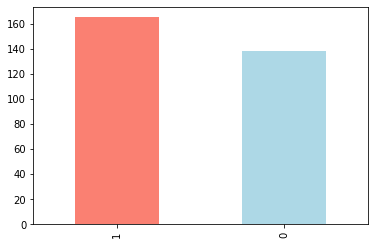

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing vlaues
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploring Heart Disease frquency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Comparing Target column with Sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


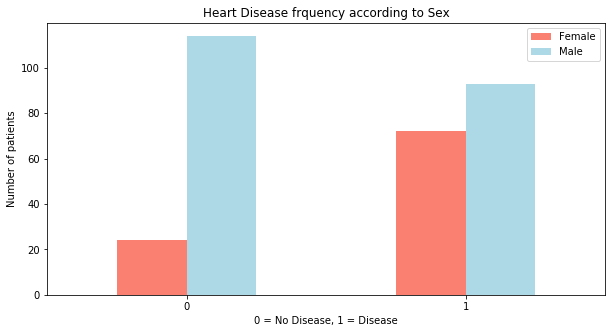

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,5), color=["salmon", "lightblue"])
plt.title("Heart Disease frquency according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease");
plt.ylabel("Number of patients")
plt.legend(("Female", "Male"))
plt.xticks(rotation=0);

### Exploring Heart Disease frquency according to Age Vs Max Heart Rate

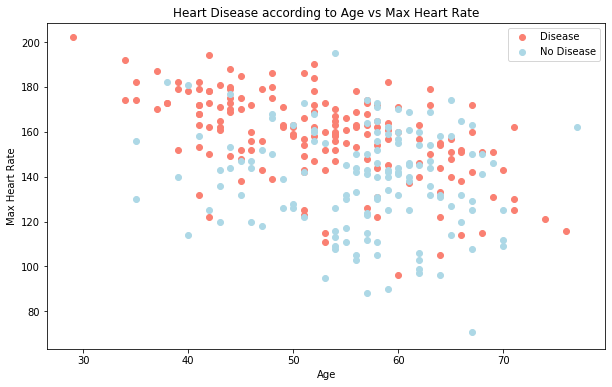

In [13]:
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter for positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# Scatter for negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")

# Add info
plt.title("Heart Disease according to Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

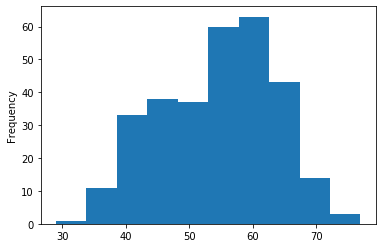

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Exploring Heart Disease frquency per CPchest (Pain Type)

In [15]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


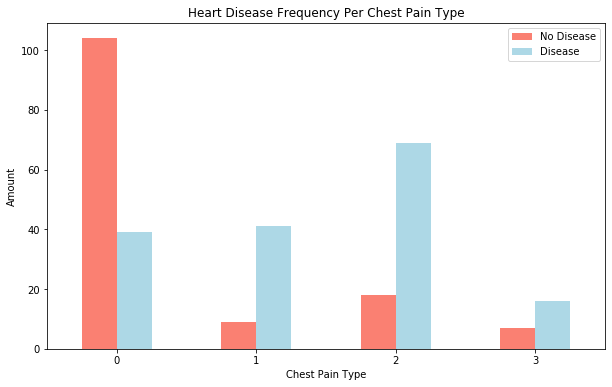

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


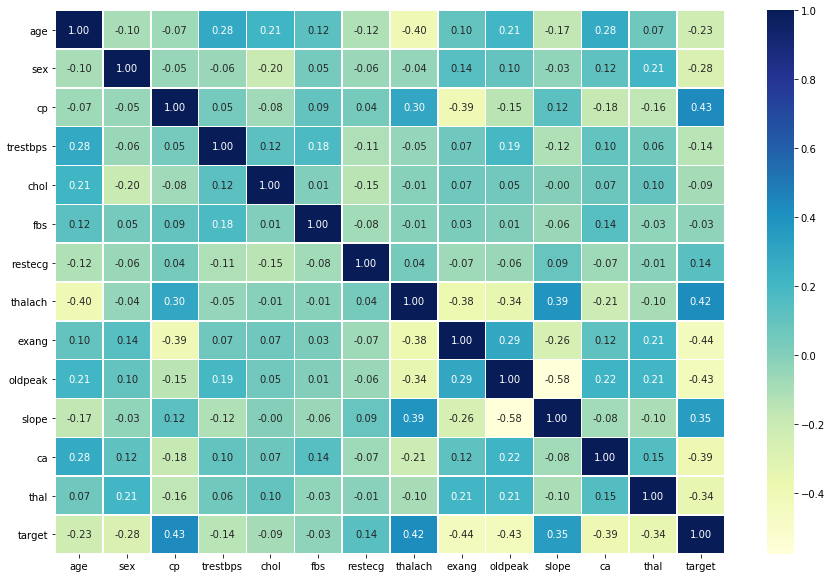

In [19]:
# Visualizing Corelation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu",fmt=".2f",linewidths=0.5)

### 5.Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Splitting data x (data), y (result)
x = df.drop("target", axis=1)
y = df["target"]

# Splitting x,y into train & tests
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
len(x_train), len(y_train)

(242, 242)

In [23]:
len(x_test), len(y_test)

(61, 61)

We're going to try 3 different 3 machine learning models and will evaluate:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

**Creating a function to fit and score the model**

In [24]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Function will fit and score each model using the training & testing data
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Creating an empty dict to store model scores
    model_scores = {}
    
    # Loop through model dictionary (models), fit and store the score in the model_score dic
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores   

In [25]:
ml_model_score = fit_and_score(models, x_train, x_test, y_train, y_test)

D:\islam\ML_Projects\hear_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
ml_model_score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7540983606557377,
 'Random Forest': 0.8688524590163934}

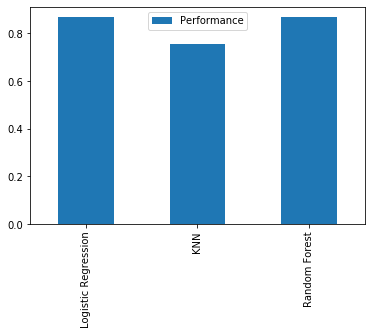

In [27]:
pd.DataFrame(ml_model_score, index=["Performance"]).T.plot(kind="bar");

### 6.Experimentation

Let's look at the following:

* Hyperparameters tunning
* Feature importance
* Confusion Matrix
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Aread under the curve (AUC)

**Hyperparameter tunning (manual)**

In [28]:
# Tunning KNN

train_scores = []
test_scores = []

np.random.seed(42)

# Create a list of different values for n_neighbors
neighbors = range(1, 21)
knn = KNeighborsClassifier()

# Loop through the different neighbors and records the values
for i in neighbors:
    knn.set_params(n_neighbors= i)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))

In [29]:
train_scores

[1.0,
 0.8057851239669421,
 0.7975206611570248,
 0.731404958677686,
 0.768595041322314,
 0.756198347107438,
 0.7231404958677686,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339,
 0.6942148760330579,
 0.7066115702479339,
 0.6900826446280992,
 0.6983471074380165,
 0.6942148760330579]

In [30]:
test_scores

[0.6721311475409836,
 0.6065573770491803,
 0.6885245901639344,
 0.7377049180327869,
 0.7540983606557377,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312]

Maximum KNN score for the test data: 75.41%


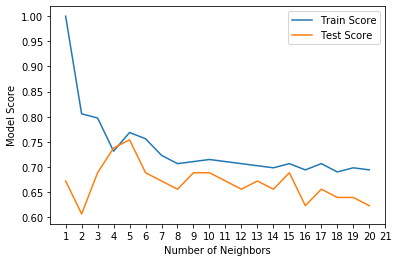

In [31]:
plt.plot(neighbors, train_scores, label= "Train Score")
plt.plot(neighbors, test_scores, label= "Test Score")
plt.xticks(range(1,22))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score for the test data: {max(test_scores)*100:.2f}%");

**Hyperparameter tunning with RandomizedSearchCV**

Tunning for:

* LogisticRegression
* RandomForestClassifier

Using RandomSearchCV

In [32]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparamerer grid for RandomForestClassifier
rf_grid = {"max_depth": [None,3 ,5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20)}

**LogisiticRegression**

In [33]:
# Tune LogistcRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)
# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [35]:
rs_log_reg.score(x_test, y_test)

0.8524590163934426

**RandomForestClassifier**

In [36]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)
# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [37]:
rs_rf.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 18, 'max_depth': 10}

In [38]:
rs_rf.score(x_test,y_test)

0.9016393442622951

## LogisticRegression Tunning with GridSearchCV
Since LogisitcRegression provides the best score, we will concentrate on further tunning LogisticRegression using GridSearchCV

In [127]:
# Different hyperparamters for LogisticRegression model
log_reg_grid = dict(C = np.logspace(-1, 2,20), solver = ['liblinear'])
np.random.seed(42)

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                          cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
     

In [128]:
gs_log_reg.best_params_

{'C': 0.20691380811147897, 'solver': 'liblinear'}

In [129]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

**Evaluting our tune machine learning classifier, byond accuracy**

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evaluate our traind model, first we need to make predictions.

In [130]:
# Make prediction with tuned model
y_preds= gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

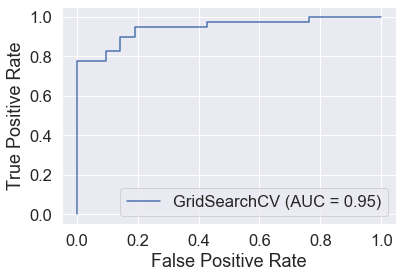

In [131]:
# Plot ROC curve and claculate AUC metrics
plot_roc_curve(gs_log_reg, x_test,y_test);

In [132]:
# confusion matrics
print(confusion_matrix(y_test, y_preds))

[[18  3]
 [ 4 36]]


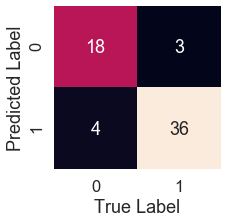

In [136]:
# Ploting confusion matrix using seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn heatmap
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)   

**Now let's get the classification report, cross-valdation, recall and f1-score**

In [135]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.92      0.90      0.91        40

    accuracy                           0.89        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.89      0.89        61



**Calculate evaluation metrics using cross-validation**

We're going to claculate accuracy, precision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [137]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20691380811147897, 'solver': 'liblinear'}

In [138]:
# Create a new classifier with best parms
clf = LogisticRegression(C=0.20691380811147897, solver= 'liblinear')

In [141]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, scoring="accuracy", cv=5)
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [146]:
# Cross-validation precision
cv_precision = cross_val_score(clf, x, y, scoring="precision", cv=5)
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [147]:
# Cross-validation recall
cv_recall = cross_val_score(clf, x, y, scoring="recall", cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [148]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf, x, y, scoring="f1", cv=5)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

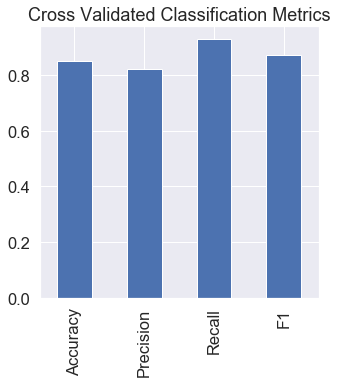

In [182]:
# Visualize cross-validated matrics
cv_metrics = pd.DataFrame(dict(Accuracy = cv_acc, Precision = cv_precision,
                               Recall = cv_recall, F1 = cv_f1),
                          index=["Score"])

cv_metrics.T.plot.bar(legend=False, figsize=(5,5))
plt.title("Cross Validated Classification Metrics");

### **Features Importance**
* Feature importance is another way of asking "Which feature contributed most to the outcome of the model and how did they contributed?"

In [184]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [185]:
clf

LogisticRegression(C=0.20691380811147897, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8852459016393442

In [191]:
# Showing the Coef
clf.coef_

array([[ 0.01253879, -0.91567922,  0.63238633, -0.01789162, -0.00432999,
         0.05694581,  0.17070889,  0.03053932, -0.51537925, -0.42493696,
         0.39944404, -0.64541467, -0.61612359]])

In [199]:
feature_dic = dict(zip(df.columns,clf.coef_[0]))
feature_df = pd.DataFrame(feature_dic, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.012539,-0.915679,0.632386,-0.017892,-0.00433,0.056946,0.170709,0.030539,-0.515379,-0.424937,0.399444,-0.645415,-0.616124


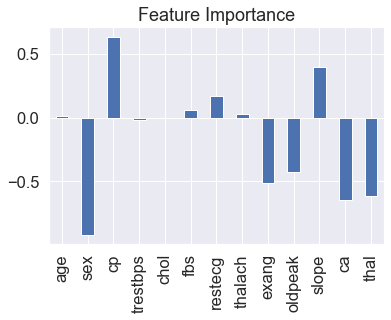

In [203]:
feature_df.T.plot.bar(title= "Feature Importance", legend= False);

In [204]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [205]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
